Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
#importing datasets

house = pd.read_csv("C:\\Users\\VALUEDSEED\\Downloads\\kc_house_data (1).csv")

house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#checking for missing figures

house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#checking the type of data

house["waterfront"].nunique()

2

In [5]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
Sam_ft = house[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", 
                "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", 
                "long", "sqft_living15", "sqft_lot15", "price"]]

Sam_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [7]:
Sam_ft["sqft_living"].nunique()

1038

In [8]:
house["sqft_lot"].nunique()

9782

In [9]:
house[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15", "price"]].nunique()

bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
price            4028
dtype: int64

bedrooms           Categorical
bathrooms          Categorical
sqft_living        Numerical
sqft_lot           Numerical
floors             Categorical
waterfront         Categorical
view               Categorical
condition          Categorical
grade              Categorical
sqft_above         Numerical
sqft_basement      Numerical
yr_built           Categorical
yr_renovated       Categorical
lat                Numerical
long               Numerical
sqft_living15      Numericalbedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
price            4028
sqft_lot15         Numerical
price              Categorical

In [10]:
#splitting out data into train and test split

x = house[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", 
           "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", 
           "lat", "long", "sqft_living15", "sqft_lot15", "price"]]

y = house["price"]



In [11]:
np.array(x)
np.array(y)

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 )

In [13]:
sc = StandardScaler()

trans = sc.fit_transform(x)

trans

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.9433552 ,
        -0.26071541, -0.86671733],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.43268619,
        -0.18786773, -0.00568792],
       [-1.47395936, -1.44746357, -1.42625404, ...,  1.07013975,
        -0.17237524, -0.98084935],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.39414129, -0.37586519],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.8412214 ,
        -0.42051149, -0.38158814],
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.41794772, -0.58588173]])

In [14]:
sc = StandardScaler()
trans1 = sc.fit_transform(Sam_ft)

trans1

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.9433552 ,
        -0.26071541, -0.86671733],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.43268619,
        -0.18786773, -0.00568792],
       [-1.47395936, -1.44746357, -1.42625404, ...,  1.07013975,
        -0.17237524, -0.98084935],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.39414129, -0.37586519],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.8412214 ,
        -0.42051149, -0.38158814],
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.41794772, -0.58588173]])

In [15]:
sam = pd.DataFrame(trans1)

sam

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,-0.381588


In [16]:
take = pd.DataFrame(trans1[:, -1])

take

,0
0,-0.866717
1,-0.005688
2,-0.980849
3,0.174090
4,-0.081958
...,...
21608,-0.490545
21609,-0.381588
21610,-0.375865
21611,-0.381588


In [17]:
sc = StandardScaler()
tp = sc.fit_transform(Sam_ft)

In [18]:
Ken = pd.DataFrame(tp)
Ken

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,-0.381588


In [19]:
x = Ken.iloc[:,:-1]
y = Ken.iloc[:,-1]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 )

In [21]:
#building our model - multiple linear Regression Model

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)


target

array([-0.23915103,  0.50254571,  0.24426757, ...,  0.04261832,
        0.42255469, -0.50374853])

In [22]:
print(mean_squared_error(y_test, target))

print(metrics.r2_score(y_test, target))

0.3288686450772884
0.6881914640759803


In [23]:
len(x_train) == len(y_train)

True

In [24]:
len(x_test) == len(y_test)

True

Simple Linear Regression Section


In [99]:
#Using Sqft bedrooms to predict price
x_bedrooms = Ken.iloc[:,0]
y_bedrooms = Ken.iloc[:,-1]

In [100]:
x_train_bedrooms, x_test_bedrooms, y_train_bedrooms, y_test_bedrooms = train_test_split(x_bedrooms, y_bedrooms, test_size = 0.2 )

In [101]:
x_train_bedrooms = np.array(x_train_bedrooms).reshape(-1, 1)
x_test_bedrooms = np.array(x_test_bedrooms).reshape(-1, 1)

In [102]:
y_train_bedrooms = np.array(y_train_bedrooms).reshape(-1, 1)
y_test__bedrooms = np.array(y_test_bedrooms).reshape(-1, 1)

In [103]:
#building our model - Simple Linear Regression 

look = LinearRegression()

In [104]:
len(x_train)

293930

In [105]:
len(y_train)

17290

In [106]:
lum = LinearRegression()

lum.fit(x_train_bedrooms, y_train_bedrooms)

target = lum.predict(x_test_bedrooms)


target

array([[-0.12104728],
       [-0.12104728],
       [ 0.2121307 ],
       ...,
       [-0.78740323],
       [-0.12104728],
       [-0.12104728]])

In [118]:
print("MSE: ", mean_squared_error(y_test_bedrooms, target))
print("R squared: ", metrics.r2_score(y_test_bedrooms, target))

MSE:  0.8936784794212602
R squared:  0.08925235753496008


In [109]:
#Using Sqft bathrooms to predict price
x_bathrooms = Ken.iloc[:,1]
y_bathrooms = Ken.iloc[:,-1]

In [110]:
x_train_bathrooms, x_test_bathrooms, y_train_bathrooms, y_test_bathrooms = train_test_split(x_bathrooms, y_bathrooms, test_size = 0.2 )

In [112]:
x_train_bathrooms = np.array(x_train_bathrooms).reshape(-1, 1)
x_test_bathrooms = np.array(x_test_bathrooms).reshape(-1, 1)
y_train_bathrooms = np.array(y_train_bathrooms).reshape(-1, 1)
y_test__bathrooms = np.array(y_test_bathrooms).reshape(-1, 1)

In [114]:
#building our model - Simple Linear Regression 

bath = LinearRegression()

In [115]:
bath.fit(x_train_bathrooms, y_train_bathrooms)

target1 = bath.predict(x_test_bathrooms)

target1

array([[ 0.2506463 ],
       [ 1.07683177],
       [ 0.0854092 ],
       ...,
       [-0.74077627],
       [-0.74077627],
       [-0.41030208]])

In [117]:
print("MSE: ", mean_squared_error(y_test_bathrooms, target1))
print("R squared: ", metrics.r2_score(y_test_bathrooms, target1))

MSE:  0.8253879488413202
R squared:  0.2944285190276197


In [119]:
#Using sqft_living to predict price

x_sqft_liv = Ken.iloc[:, 2]
y_sqft_liv = Ken.iloc[:, -1]

In [120]:
x_train_liv, x_test_liv, y_train_liv, y_test_liv = train_test_split(x_sqft_liv,y_sqft_liv, test_size = 0.2 )

In [121]:
x_train_liv = np.array(x_train_liv).reshape(-1, 1)
x_test_liv = np.array(x_test_liv).reshape(-1, 1)

In [122]:
lm = LinearRegression()

lm.fit(x_train_liv, y_train_liv)

target = lm.predict(x_test_liv)


target

array([-0.19194816,  0.38862746, -0.38547337, ..., -0.81122882,
       -0.42417841, -0.49384748])

In [123]:
print("MSE: ", mean_squared_error(y_test_liv, target))
print("R squared: ", metrics.r2_score(y_test_liv, target))

MSE:  0.4776181600435957
R squared:  0.47150125995824765


In [124]:
#Using sqft_lot to predict price

x_sqft_lot = Ken.iloc[:, 3]
y_sqft_lot = Ken.iloc[:, -1]

In [125]:
x_train_lot, x_test_lot, y_train_lot, y_test_lot = train_test_split(x_sqft_lot,y_sqft_lot, test_size = 0.2 )

In [126]:
x_train_lot = np.array(x_train_lot).reshape(-1, 1)
x_test_lot = np.array(x_test_lot).reshape(-1, 1)

In [127]:
lim = LinearRegression()

lim.fit(x_train_lot, y_train_lot)

target = lim.predict(x_test_lot)


target

array([-0.00749465, -0.02318024, -0.00414717, ..., -0.02724447,
       -0.03093214, -0.025933  ])

In [128]:
print("MSE: ", mean_squared_error(y_test_lot, target))
print("R squared: ", metrics.r2_score(y_test_lot, target))

MSE:  1.024500230969496
R squared:  0.00022253726245236027


In [129]:
#Using floors to predict price

x_floors = Ken.iloc[:, 4]
y_floors = Ken.iloc[:, -1]

In [130]:
x_train_floors, x_test_floors, y_train_floors, y_test_floors = train_test_split(x_floors,y_floors, test_size = 0.2 )

In [131]:
x_train_floors = np.array(x_train_floors).reshape(-1, 1)
x_test_floors = np.array(x_test_floors).reshape(-1, 1)

In [132]:
limo = LinearRegression()

limo.fit(x_train_lot, y_train_lot)

target = limo.predict(x_test_lot)


target

array([-0.00749465, -0.02318024, -0.00414717, ..., -0.02724447,
       -0.03093214, -0.025933  ])

In [133]:
print("MSE: ", mean_squared_error(y_test_floors, target))
print("R squared: ", metrics.r2_score(y_test_floors, target))

MSE:  0.8880541771191096
R squared:  -0.025951672180663632


In [134]:
#Using condition to predict price

x_condition = Ken.iloc[:, 7]
y_condition = Ken.iloc[:, -1]

In [135]:
x_train_condition, x_test_condition, y_train_condition, y_test_condition = train_test_split(x_condition,y_condition, test_size = 0.2 )

In [136]:
x_train_condition = np.array(x_train_condition).reshape(-1, 1)
x_test_condition = np.array(x_test_condition).reshape(-1, 1)

In [137]:
linear_model = LinearRegression()

linear_model.fit(x_train_condition, y_train_condition)

target = linear_model.predict(x_test_condition)


target

array([-0.02263147, -0.02263147,  0.03444354, ..., -0.02263147,
        0.03444354, -0.02263147])

In [138]:
print("MSE: ", mean_squared_error(y_test_condition, target))
print("R squared: ", metrics.r2_score(y_test_condition, target))

MSE:  1.0180918703086532
R squared:  0.0010598962469988704


In [139]:
#Using grade to predict price

x_grade = Ken.iloc[:, 8]
y_grade = Ken.iloc[:, -1]

x_train_grade, x_test_grade, y_train_grade, y_test_grade = train_test_split(x_grade,y_grade, test_size = 0.2 )

x_train_grade = np.array(x_train_grade).reshape(-1, 1)
x_test_grade = np.array(x_test_grade).reshape(-1, 1)

linear_mod = LinearRegression()

linear_mod.fit(x_train_grade, y_train_grade)

target = linear_model.predict(x_test_grade)

print("MSE: ", mean_squared_error(y_test_grade, target))
print("R squared: ", metrics.r2_score(y_test_grade, target))

MSE:  0.9122422680869019
R squared:  0.04678000926474413


Polynomial Regression

In [140]:
#initiate the polynomial object from the preprocessing library

poly = PolynomialFeatures(3)

In [141]:
poly.fit_transform(x_train_liv)

array([[ 1.        ,  0.78406452,  0.61475718,  0.48200929],
       [ 1.        , -0.13055006,  0.01704332, -0.00222501],
       [ 1.        , -0.26774224,  0.07168591, -0.01919335],
       ...,
       [ 1.        , -1.28470655,  1.65047091, -2.12037079],
       [ 1.        , -0.65209813,  0.42523197, -0.27729297],
       [ 1.        ,  1.13248912,  1.28253161,  1.4524531 ]])

In [142]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [143]:
x_floors

0       -0.915427
1        0.936506
2       -0.915427
3       -0.915427
4       -0.915427
           ...   
21608    2.788439
21609    0.936506
21610    0.936506
21611    0.936506
21612    0.936506
Name: 4, Length: 21613, dtype: float64

In [144]:
x_floors = Ken.iloc[:, 4]
y_floors = Ken.iloc[:, -1]

x_train_floors, x_test_floors, y_train_floors, y_test_floors = train_test_split(x_floors,y_floors, test_size = 0.2 )

x_train_floors = np.array(x_train_floors).reshape(-1, 1)
x_test_floors = np.array(x_test_floors).reshape(-1, 1)
y_train_floors = np.array(y_train_floors).reshape(-1, 1)
y_test_floors = np.array(y_test_floors).reshape(-1, 1)

linear_mod = LinearRegression()

linear_mod.fit(x_train_floors, y_train_floors)

target = linear_model.predict(x_test_floors)

print("MSE: ", mean_squared_error(y_test_floors, target))
print("R squared: ", metrics.r2_score(y_test_floors, target))

MSE:  0.8335506901062608
R squared:  0.01872990663607188


In [146]:
sc = StandardScaler()

In [147]:
x_train_floors = sc.fit_transform(x_train_floors)
y_train_floors = sc.fit_transform(y_train_floors)

In [148]:
lin_reg = LinearRegression()

In [149]:
lin_reg.fit(x_train_floors, y_train_floors)

LinearRegression()

In [150]:
print("Intercept constant for our linear model: ", lin_reg.intercept_)
print("coefficient of x for our linear model: ", lin_reg.coef_)

Intercept constant for our linear model:  [5.34126034e-18]
coefficient of x for our linear model:  [[0.25698488]]


In [151]:
y_predict = lin_reg.predict(x_train_floors)


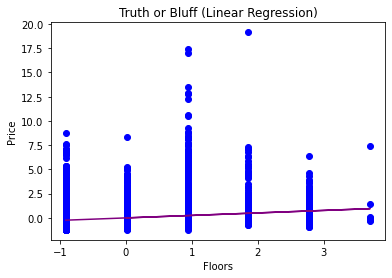

In [157]:
#using a Linear regression model
plt.scatter(x_train_floors, y_train_floors, color = "blue")
plt.plot(x_train_floors, y_predict, color = "purple")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

In [158]:
#using a polynomial Function for presentation

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)

In [159]:
x_poly = poly.fit_transform(x_test_floors)

lin_reg_2 = LinearRegression()

lin_reg_2.fit(x_poly, y_test_floors)

LinearRegression()

In [160]:
x_poly_pred = lin_reg_2.predict(x_poly)

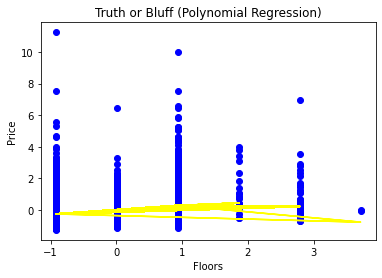

In [161]:
plt.scatter(x_test_floors, y_test_floors, color = "blue")
plt.plot(x_test_floors, x_poly_pred, color = "yellow")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()